## Load Data from CSVs

In [177]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()


def read_csv(filename):
    
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = read_csv('enrollments.csv')
enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [178]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')
print (daily_engagement[0])
project_submissions[0]

{'acct': '0', 'num_courses_visited': '1.0', 'projects_completed': '0.0', 'utc_date': '2015-01-09', 'lessons_completed': '0.0', 'total_minutes_visited': '11.6793745'}


{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': '2015-01-16',
 'creation_date': '2015-01-14',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Fixing Data Types

In [179]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[77]

{'account_key': '215',
 'cancel_date': None,
 'days_to_cancel': None,
 'is_canceled': False,
 'is_udacity': False,
 'join_date': datetime.datetime(2014, 11, 14, 0, 0),
 'status': 'current'}

In [180]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [181]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[1]

{'account_key': '256',
 'assigned_rating': 'INCOMPLETE',
 'completion_date': datetime.datetime(2015, 1, 13, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 10, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [182]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for e in daily_engagement:
    
    e['account_key'] = e.pop('acct')
    
daily_engagement[19]

{'account_key': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 55.2349593333,
 'utc_date': datetime.datetime(2015, 1, 28, 0, 0)}

## Investigating the Data

In [183]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

print (len(enrollments), 'enrollments')
unique_enrolled_students = get_unique_students(enrollments)
print (len(unique_enrolled_students), 'unique enrolled students')
print (len(daily_engagement), 'daily engagement')
unique_engagement_students = get_unique_students(daily_engagement)
print (len(unique_engagement_students), 'unique engagement students')
print (len(project_submissions), 'submissions')
unique_project_submitters = get_unique_students(project_submissions)
print (len(unique_project_submitters), 'unique submitters')

1640 enrollments
1302 unique enrolled students
136240 daily engagement
1237 unique engagement students
3642 submissions
743 unique submitters


## Problems in the Data

## Missing Engagement Records

In [184]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

missing_enr_key = []
missing_enr = []

for e in unique_enrolled_students:
    if e not in unique_engagement_students:
        # print (e)
        missing_enr_key.append(e)


for e in enrollments:    
    if e['account_key'] in missing_enr_key:
        missing_enr.append(e)

print (missing_enr[4:6]) 
    

[{'is_canceled': True, 'join_date': datetime.datetime(2014, 12, 4, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'account_key': '654', 'status': 'canceled', 'cancel_date': datetime.datetime(2014, 12, 4, 0, 0)}, {'is_canceled': True, 'join_date': datetime.datetime(2014, 12, 3, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'account_key': '654', 'status': 'canceled', 'cancel_date': datetime.datetime(2014, 12, 3, 0, 0)}]


## Checking for More Problem Records

In [185]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print (enrollment)
        num_problem_students += 1

num_problem_students

{'is_canceled': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'account_key': '1304', 'status': 'canceled', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0)}
{'is_canceled': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'account_key': '1304', 'status': 'canceled', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0)}
{'is_canceled': False, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'days_to_cancel': None, 'is_udacity': True, 'account_key': '1101', 'status': 'current', 'cancel_date': None}


3

## Tracking Down the Remaining Problems

In [186]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [187]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [188]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [189]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for e in non_udacity_enrollments:
    if not e['is_canceled'] or e['days_to_cancel'] > 7:
        key = e['account_key']
        date = e['join_date']
       
        
        if key not in paid_students or \
                date > paid_students[key]:
            paid_students[key] = date
        
len(paid_students)
print (list(paid_students)[0:10])

['115', '586', '509', '549', '225', '62', '284', '762', '435', '245']


## Getting Data from First Week

In [190]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [191]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def trial_remove(data):
    new_data = []
    for p in data:
        if p['account_key'] in paid_students:
            new_data.append(p)
    return new_data

paid_enrollments = trial_remove(non_udacity_enrollments)
paid_engagement = trial_remove(non_udacity_engagement)
paid_submissions = trial_remove(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))



1293
134549
3618


In [192]:
for r in paid_engagement:
    if r['num_courses_visited'] > 0:
        r['has_visited'] = 1
    else:
        r['has_visited'] = 0
    

In [233]:
week_one_paid_engagement = []

for e in paid_engagement:
    key = e['account_key']
    join_date = paid_students[key]
    engagement_date =e['utc_date']
    
    if within_one_week(join_date, engagement_date):
        week_one_paid_engagement.append(e)
        
print (len(week_one_paid_engagement))
print (list(week_one_paid_engagement)[0:5])

6919
[{'num_courses_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'lessons_completed': 0, 'total_minutes_visited': 11.6793745, 'account_key': '0', 'has_visited': 1}, {'num_courses_visited': 2, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 10, 0, 0), 'lessons_completed': 0, 'total_minutes_visited': 37.2848873333, 'account_key': '0', 'has_visited': 1}, {'num_courses_visited': 2, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 11, 0, 0), 'lessons_completed': 0, 'total_minutes_visited': 53.6337463333, 'account_key': '0', 'has_visited': 1}, {'num_courses_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 12, 0, 0), 'lessons_completed': 0, 'total_minutes_visited': 33.4892696667, 'account_key': '0', 'has_visited': 1}, {'num_courses_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 1, 13, 0, 0), 'lessons_completed': 0, 'total_minutes_visited': 64.7796776667, 'account_key

## Exploring Student Engagement

In [194]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(data, keyname):
    grouped_data = defaultdict(list)
    for p in data:
        key = p[keyname]
        grouped_data[key].append(p)
    return grouped_data

engagement_by_account = group_data(week_one_paid_engagement, 'account_key')


In [232]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_grouped_data(grouped_data, field_name):
    summed_data = {}
    for key, points in grouped_data.items():
        total = 0
        for point in points:
            total += point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_data(engagement_by_account,
                                           'total_minutes_visited')
list(total_minutes_by_account)[0:5]

['115', '586', '1287', '509', '1146']

In [219]:
import numpy as np

# Summarize the data about minutes spent in the classroom

def describe_data(data):
    data = list(data)
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [220]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

max_minutes_student = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        max_minutes_student = student
        
print (max_minutes, "\n")

for e in week_one_paid_engagement:
    if e['account_key'] == max_minutes_student:
        print (e)


3564.7332644989997 

{'num_courses_visited': 4, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'lessons_completed': 4, 'total_minutes_visited': 850.519339666, 'account_key': '163', 'has_visited': 1}
{'num_courses_visited': 6, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'lessons_completed': 6, 'total_minutes_visited': 872.633923334, 'account_key': '163', 'has_visited': 1}
{'num_courses_visited': 2, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'lessons_completed': 6, 'total_minutes_visited': 777.018903666, 'account_key': '163', 'has_visited': 1}
{'num_courses_visited': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'lessons_completed': 2, 'total_minutes_visited': 294.568774, 'account_key': '163', 'has_visited': 1}
{'num_courses_visited': 3, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'lessons_completed': 1, 'total_minutes_visited': 471.2139

## Lessons Completed in First Week

In [221]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

lessons_by_account = sum_grouped_data(engagement_by_account, 'lessons_completed')
describe_data(lessons_by_account.values())

# for account_key, engagement_for_student in engagement_by_account.items():
#     total_lessons = 0
#     for engagement_record in engagement_for_student:
#         total_lessons += engagement_record['lessons_completed']
#     total_lessons_by_account[account_key] = total_lessons

# total_lessons = total_lessons_by_account.values()    

# print ('Mean:', np.mean(list(total_lessons)))
# print ('Standard deviation:', np.std(list(total_lessons)))
# print ('Minimum:', np.min(list(total_lessons)))
# print ('Maximum:', np.max(list(total_lessons)))

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [222]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

days_by_account = sum_grouped_data(engagement_by_account, 'has_visited')
describe_data(days_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [230]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']


pass_subway_project = set()
for s in paid_submissions:
    project = s['lesson_key']
    rating = s['assigned_rating']
    
    if project in subway_project_lesson_keys and \
        rating in ['PASSED', 'DISTINCTION']:
        pass_subway_project.add(s['account_key'])
    
print (len(pass_subway_project))

passing_engagement = []
non_passing_engagement = []

for engagement_record in week_one_paid_engagement:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print (len(passing_engagement))
print (len(non_passing_engagement))


# print (list(passing_engagement)[0:10], '\n')
# print (list(non_passing_engagement)[0:10])


647
4527
2392


## Comparing the Two Student Groups

In [235]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')


In [270]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%pylab inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    data = list(data)
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    plt.hist(data)

Populating the interactive namespace from numpy and matplotlib


non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


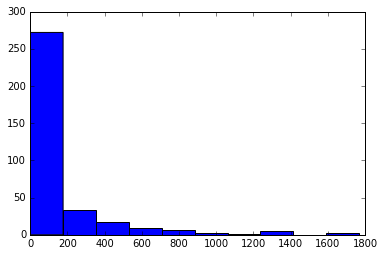

In [271]:
print ('non-passing students:')
non_passing_minutes = sum_grouped_data(non_passing_engagement_by_account, 'total_minutes_visited')

describe_data(non_passing_minutes.values())

passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


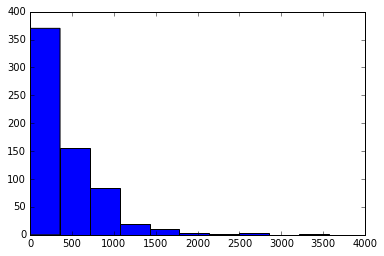

In [272]:
print ('passing students:')
passing_minutes = sum_grouped_data(passing_engagement_by_account, 'total_minutes_visited')

describe_data(passing_minutes.values())

non-passing students lessons:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


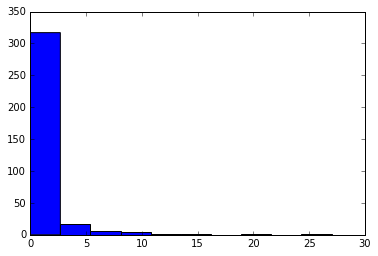

In [273]:
print ('non-passing students lessons:')
non_passing_lessons = sum_grouped_data(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

passing students lessons:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


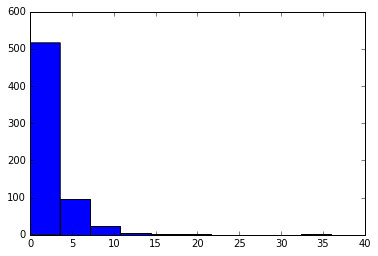

In [274]:
print ('passing students lessons:')
passing_lessons = sum_grouped_data(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

non-passing students days:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


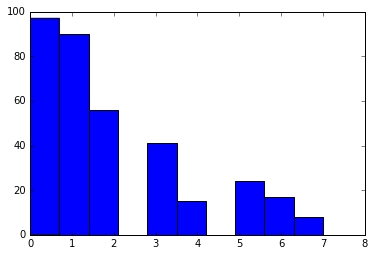

In [275]:
print ('non-passing students days:')
non_passing_visits = sum_grouped_data(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

passing students days:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


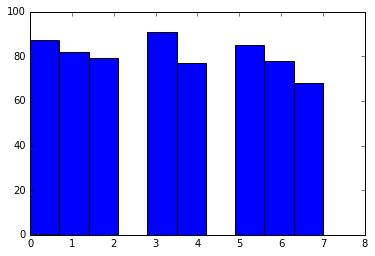

In [276]:
print ('passing students days:')
passing_visits = sum_grouped_data(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())

## Making Histograms

## Improving Plots and Sharing Findings

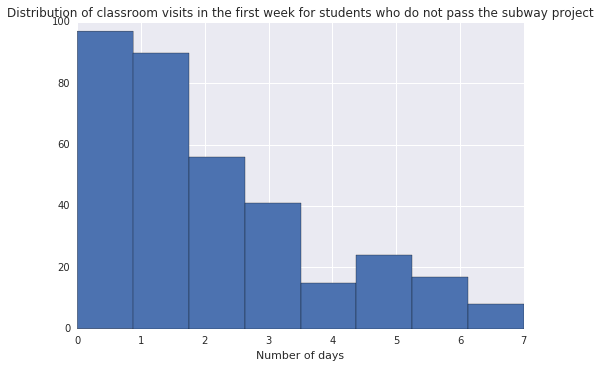

In [289]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(list(non_passing_visits.values()), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

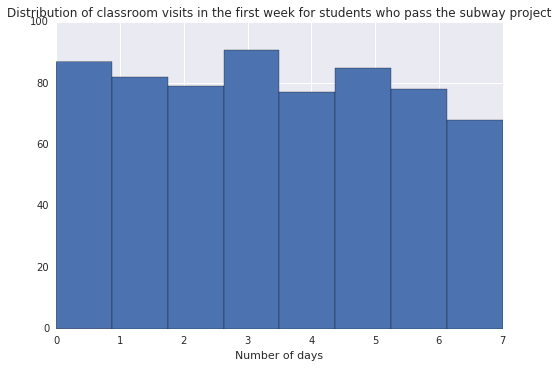

In [290]:
plt.hist(list(passing_visits.values()), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')